In [86]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
df = pd.read_csv('/content/drive/MyDrive/globaldfismdb_0718dist.csv',encoding='ISO-8859-1')

<ipython-input-19-b2cab92915db>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')


In [21]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [24]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [26]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [28]:
df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed', 'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [30]:
df.isnull().sum()


Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [37]:
print("Country with the most attacks:",df['Country'].value_counts().idxmax())
print("City with the most attacks:",df['city'].value_counts().index[1])
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())
country_wounded = df.groupby('Country')['Wounded'].sum().reset_index()
most_wounded_country = country_wounded.loc[country_wounded['Wounded'].idxmax()]
print("Country with the most wounded:",most_wounded_country['Country'])

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion
Country with the most wounded: Iraq


<ipython-input-39-50ec97883704>:3: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only.
  cities = df.state.dropna(False)


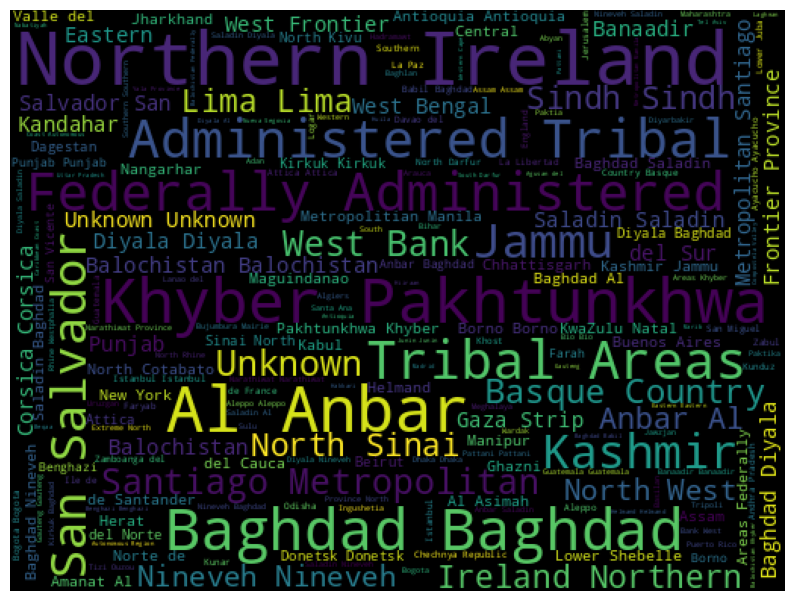

In [39]:
from wordcloud import WordCloud
from scipy import signal
cities = df.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'black',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

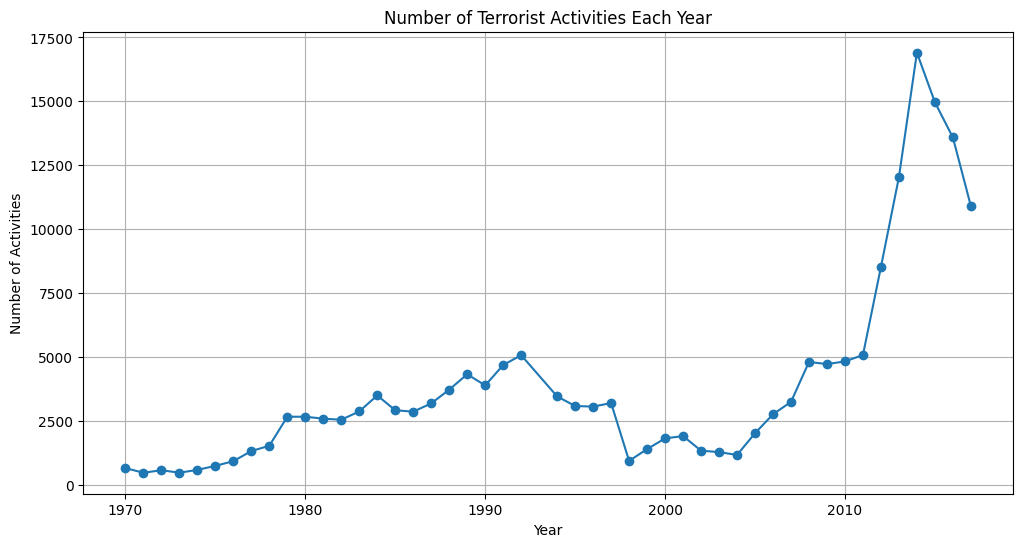

In [40]:
terrorist_activities_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(terrorist_activities_per_year.index, terrorist_activities_per_year.values, marker='o', linestyle='-')
plt.title('Number of Terrorist Activities Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Activities')
plt.grid(True)

plt.show()

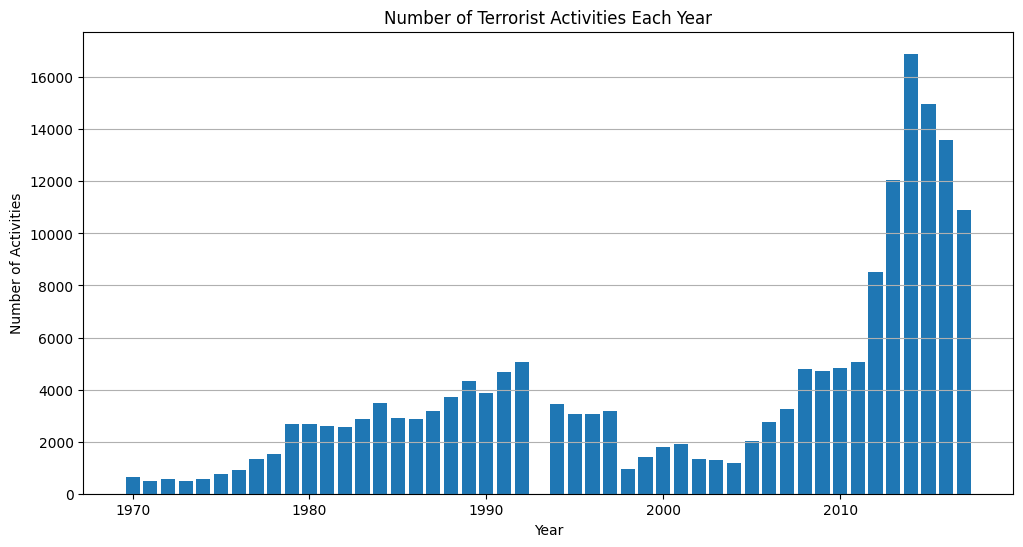

In [41]:
terrorist_activities_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(terrorist_activities_per_year.index, terrorist_activities_per_year.values)
plt.title('Number of Terrorist Activities Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Activities')
plt.grid(axis='y')

plt.show()

In [43]:
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['casualities'] = df['Killed'] + df['Wounded']

<ipython-input-43-4923babdcbe0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wounded'] = df['Wounded'].fillna(0).astype(int)
<ipython-input-43-4923babdcbe0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Killed'] = df['Killed'].fillna(0).astype(int)
<ipython-input-43-4923babdcbe0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [44]:
terror1 = df.sort_values(by='casualities',ascending=False)[:40]
heat=terror1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)
heat.head()


Year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


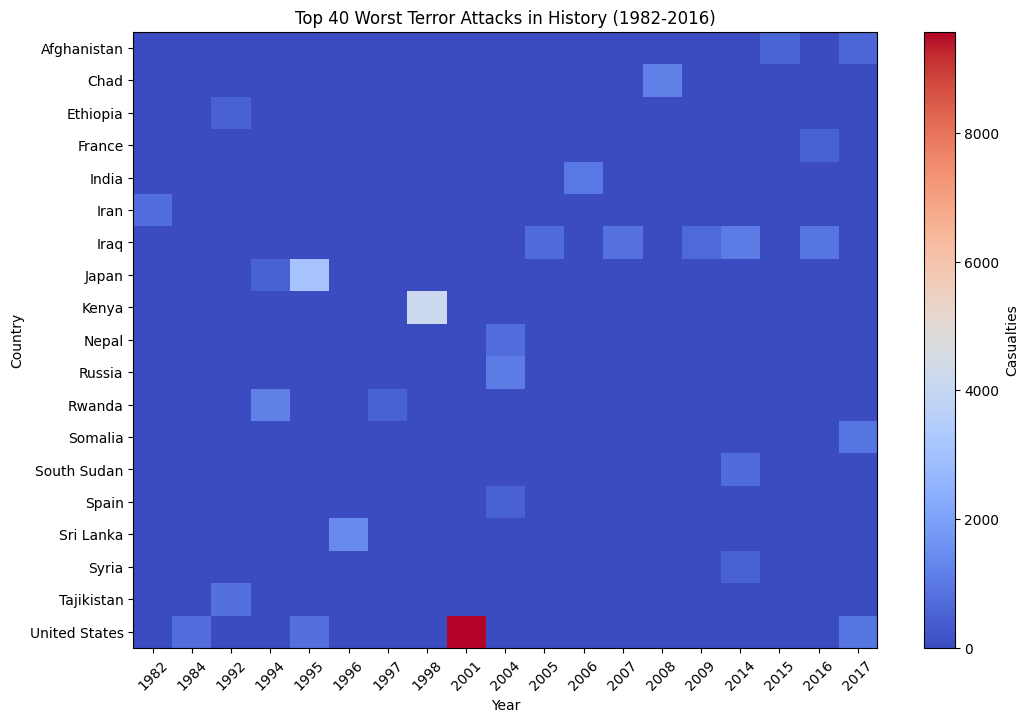

In [88]:

plt.figure(figsize=(12, 8))
plt.imshow(heat.values, cmap='coolwarm', aspect='auto')

# Customize the plot
plt.colorbar(label='Casualties')
plt.title('Top 40 Worst Terror Attacks in History (1982-2016)')
plt.xlabel('Year')
plt.ylabel('Country')

# Set x-axis and y-axis tick labels
plt.xticks(np.arange(len(heat.columns)), heat.columns, rotation=45)
plt.yticks(np.arange(len(heat.index)), heat.index)

# Display the heatmap
plt.show()

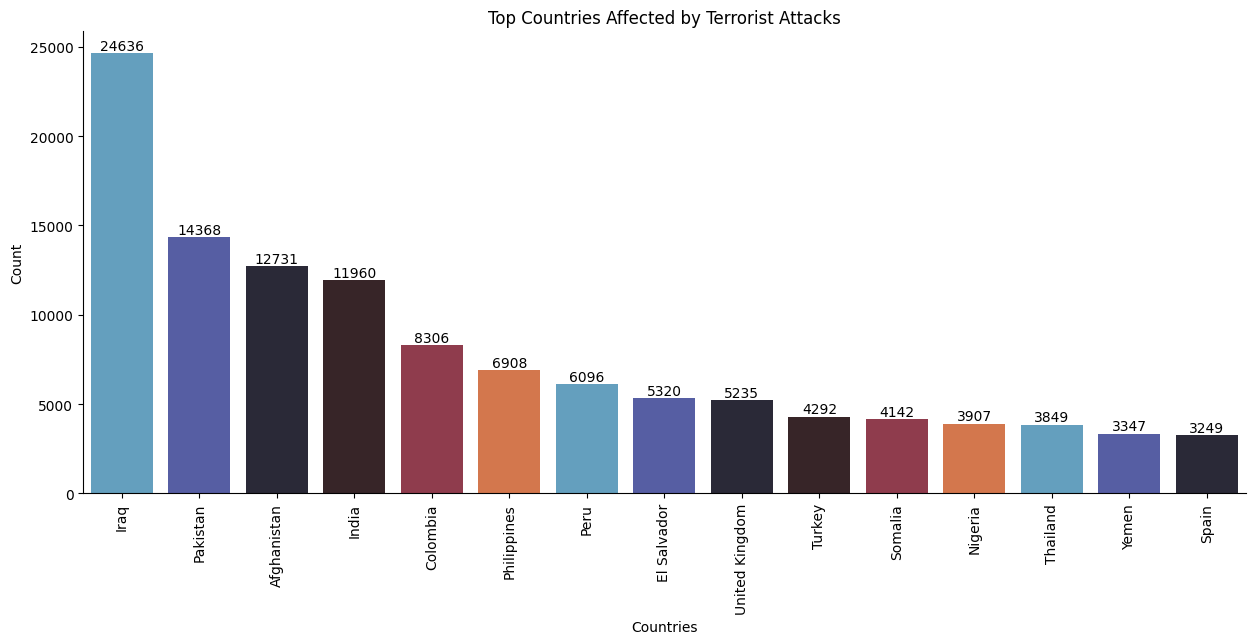

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = sns.color_palette("icefire")

plt.figure(figsize=(15, 6))
sns.barplot(
    x=df['Country'].value_counts()[:15].index,
    y=df['Country'].value_counts()[:15].values,
    palette=custom_palette
)

plt.title('Top Countries Affected by Terrorist Attacks')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)

for i, v in enumerate(df['Country'].value_counts()[:15].values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)

sns.despine()
plt.show()


In [63]:
!pip install folium

In [65]:
import folium
from folium.plugins import MarkerCluster
filterYear = df['Year'] == 1970

In [66]:
filterData = df[filterYear]
reqFilterData = filterData.loc[:,'city':'longitude']
reqFilterData = reqFilterData.dropna()
reqFilterDataList = reqFilterData.values.tolist()


In [74]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

In [76]:
df.Group.value_counts()[1:15]


Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: Group, dtype: int64

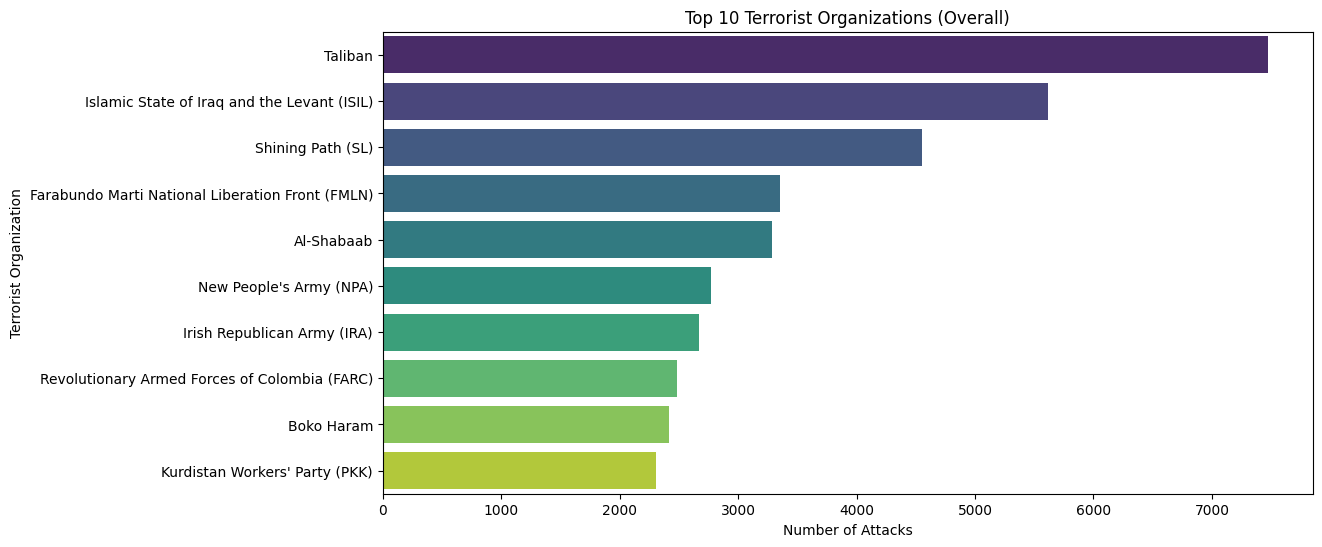

In [78]:
filtered_df = df[df['Group'] != 'Unknown']
terrorist_organization_counts = pd.crosstab(filtered_df['Country'], filtered_df['Group'])

top_N = 10
top_organizations_overall = terrorist_organization_counts.stack().reset_index(name='Counts')
top_organizations_overall = top_organizations_overall.groupby('Group')['Counts'].sum().nlargest(top_N).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Counts', y='Group', data=top_organizations_overall, palette='viridis')
plt.title(f'Top {top_N} Terrorist Organizations (Overall)')
plt.xlabel('Number of Attacks')
plt.ylabel('Terrorist Organization')

plt.show()

Number of people killed by terror attack: 411868


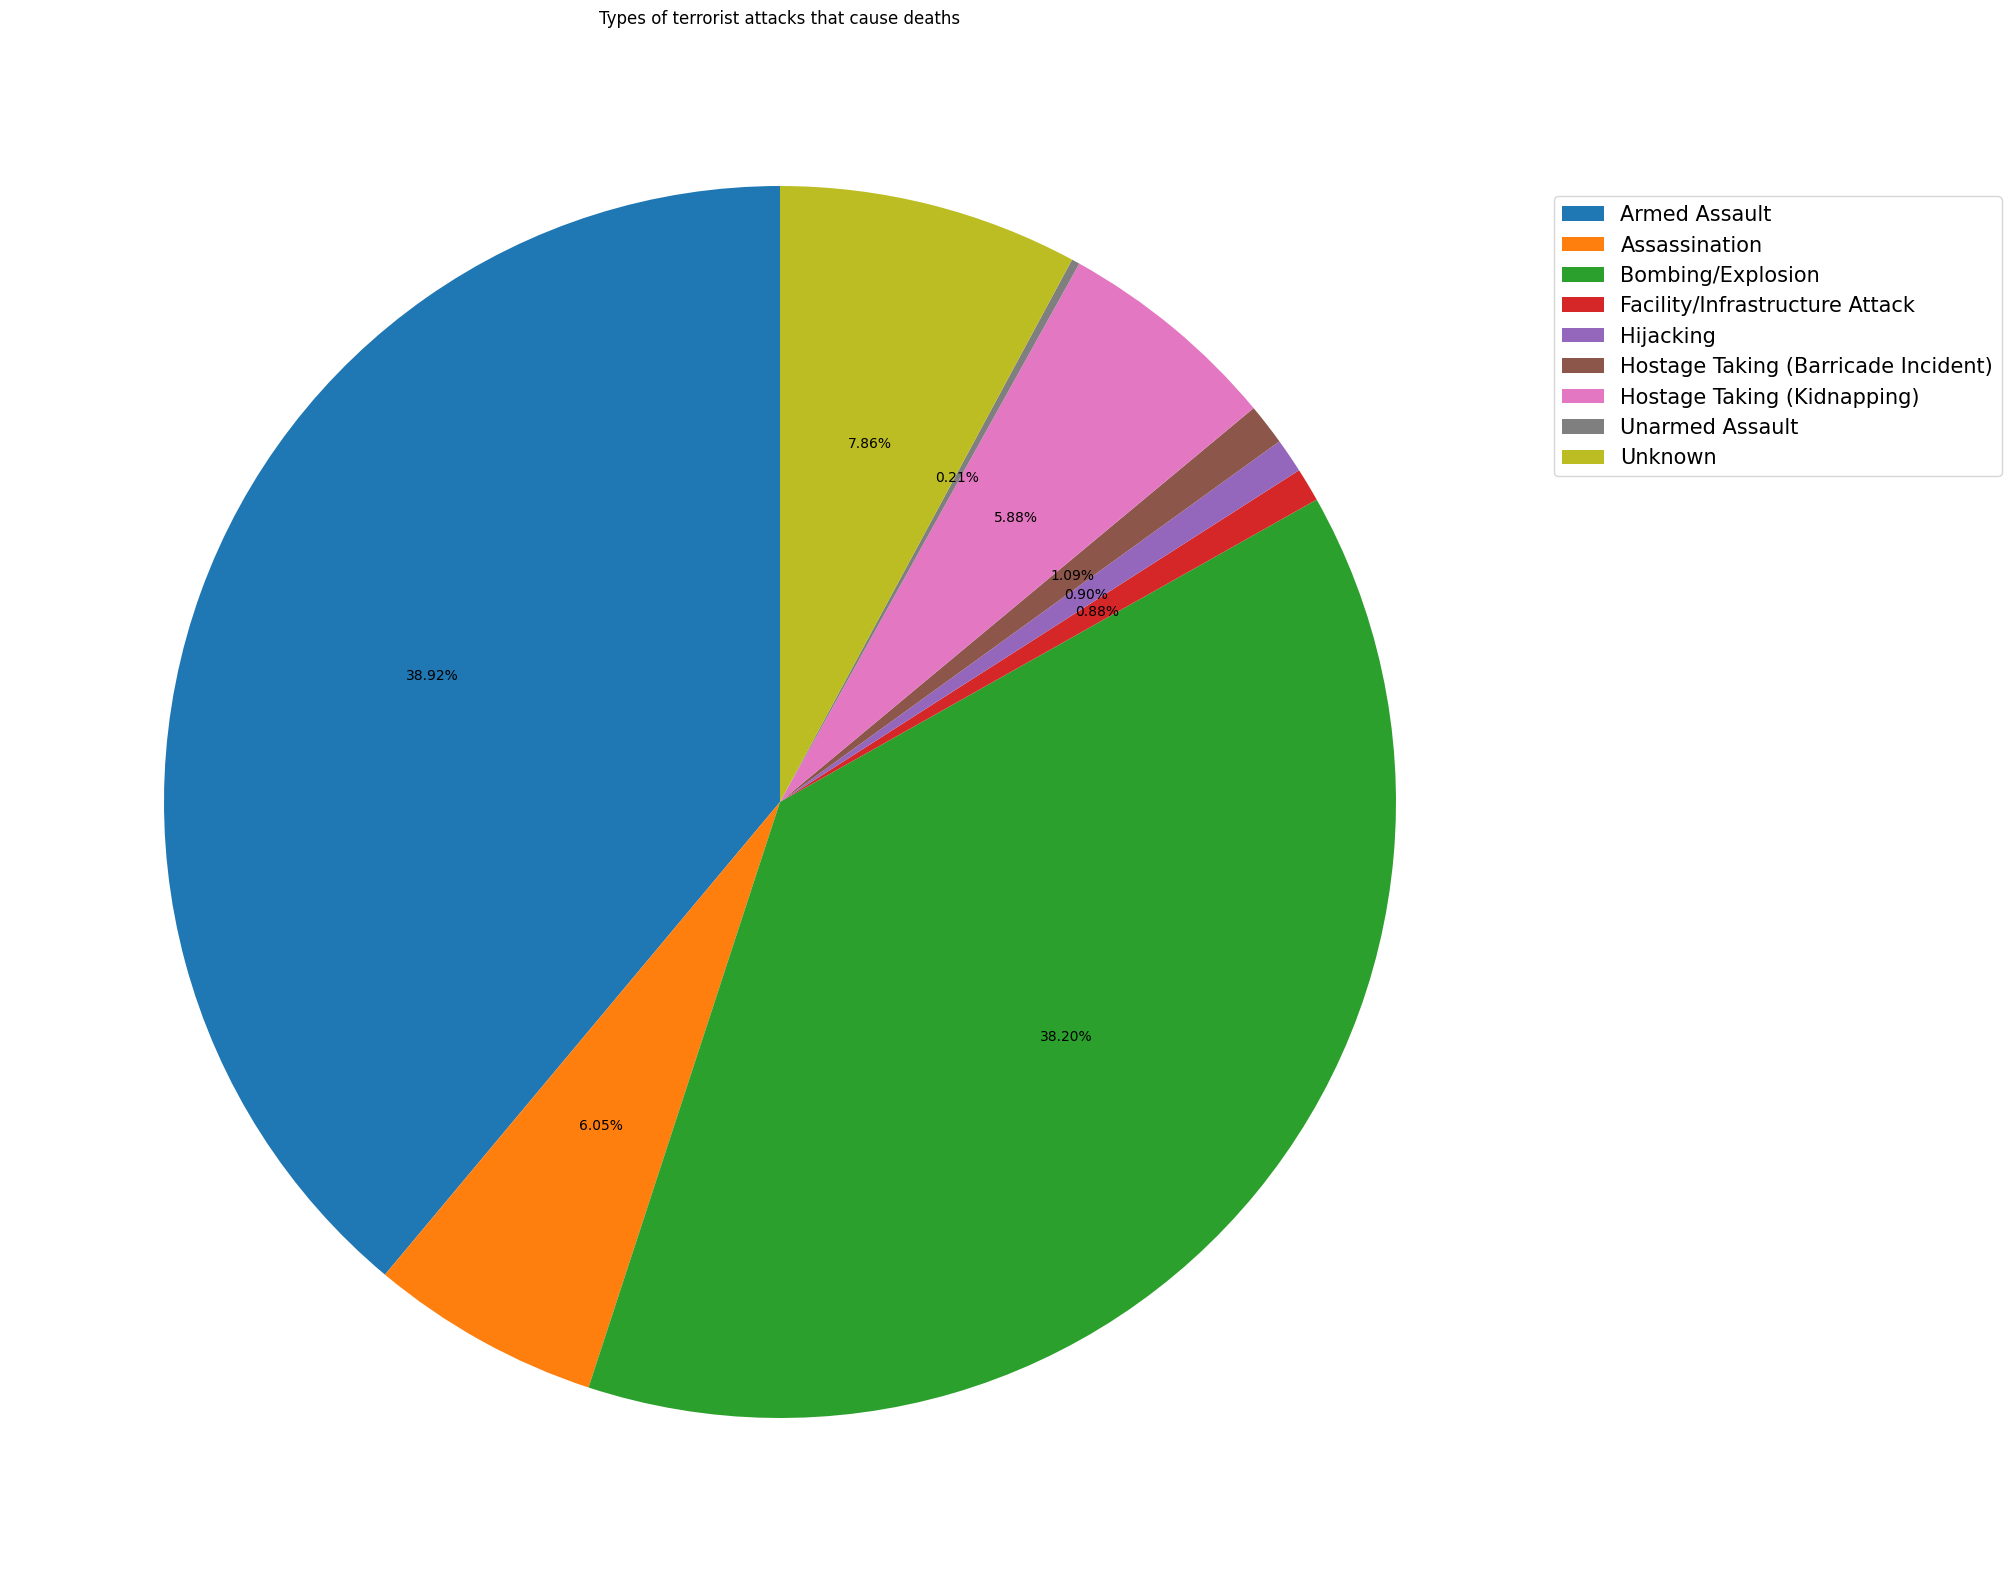

In [87]:
killData = df.loc[:, 'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

attackData = df.loc[:, 'AttackType']
typeKillData = pd.concat([attackData, killData], axis=1)

typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
values = np.ravel(typeKillFormatData.values)

labels = typeKillFormatData.columns.tolist()

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.3, 0.9), fontsize=15)
plt.show()